In [1]:
import os
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
import rdkit
from IPython.display import SVG

from rdkit.Chem import ChemicalFeatures
fdef = os.path.join(RDConfig.RDContribDir, 'M_Kossner/BaseFeatures_DIP2_NoMicrospecies.fdef')
ffact = ChemicalFeatures.BuildFeatureFactory(fdef)

In [2]:
rdDepictor.SetPreferCoordGen(True)
rdkit.__version__

'2020.03.1'

In [3]:
sdf = os.path.join(RDConfig.RDDocsDir, 'Book/data/cdk2.sdf')
mols = [m for m in Chem.SDMolSupplier(sdf)]
for m in mols:
    AllChem.Compute2DCoords(m)
mol1 = mols[1]

In [4]:
# the code is bollowed from following url.
# https://bit.ly/3aTUBCU
class HorizontalDisplay:
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        template = '<div style="float: left; padding: 10px;">{0}</div>'
        return "\n".join(template.format(arg)
                         for arg in self.args)

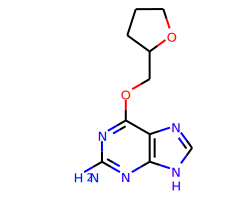

In [5]:
d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
d2d.DrawMolecule(mol1)
d2d.FinishDrawing()
text1 = d2d.GetDrawingText()
SVG(d2d.GetDrawingText())

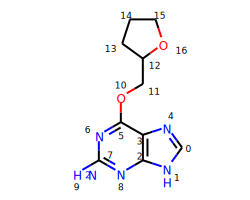

In [6]:
d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
d2d.drawOptions().addAtomIndices = True
d2d.DrawMolecule(mol1)
d2d.FinishDrawing()
text2 = d2d.GetDrawingText()
SVG(d2d.GetDrawingText())

In [7]:
from collections import defaultdict
feats = ffact.GetFeaturesForMol(mol1)
colors = {'SingleAtomDonor':(1,0.5,0.5),
          'SingleAtomAcceptor':(0.5,0.5,1),
          'BasicGroup':(0,1,1),
          'Arom6':(1,0.8,0.5),
          'Hphobe':(0.7,0.7,0.3)}

In [8]:
atomHighlighs = defaultdict(list)
highlightRads = {}
for feat in feats:
    if feat.GetType() in colors:
        clr = colors[feat.GetType()]
        for aid in feat.GetAtomIds():
            atomHighlighs[aid].append(clr)
            highlightRads[aid] = 0.4

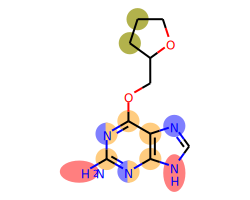

In [9]:
d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
d2d.DrawMoleculeWithHighlights(mol1, '', dict(atomHighlighs), {}, highlightRads, {})
d2d.drawOptions().addAtomIndices = True
d2d.FinishDrawing()
text3 = d2d.GetDrawingText()
SVG(d2d.GetDrawingText())

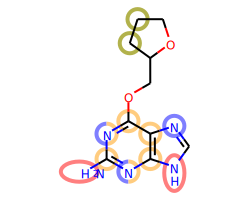

In [10]:
d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
dos = d2d.drawOptions()
dos.atomHighlightsAreCricle = True
dos.fillHighlights = False
d2d.DrawMoleculeWithHighlights(mol1, '', dict(atomHighlighs), {}, highlightRads, {})
d2d.drawOptions().addAtomIndices = True
d2d.FinishDrawing()
text4 = d2d.GetDrawingText()
SVG(d2d.GetDrawingText())

In [11]:
HorizontalDisplay(text1, text2, text3, text4)